### Aula 2

In [ ]:
from pathlib import Path

import kagglehub

# Download latest version
dataset_str = kagglehub.dataset_download(
    handle="danielluzzi/ccee-brazil-energy-consumption"
)

data_base_dir = Path(dataset_str)

In [43]:
from pandas import read_csv

wheat_csv = data_base_dir / "CCEE_BR_Data.csv"

# Para definir um esquema para os tipos dos dados ao ler o CSV, use o parâmetro 'dtype' do read_csv:
dtypes = {
    "Data": str,
    "Classe": str,
    "Ramo": str,
    "Submercado": str,
    "UF": str,
    "Consumo": float,
    "Covid": bool,
}

df = read_csv(wheat_csv, dtype=dtypes)

In [44]:
df.head()

,Data,Classe,Ramo,Submercado,UF,Consumo,Covid
0,01/07/2018,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.01,False
1,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.00,False
2,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,0.68,False
3,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,SC,1.88,False
4,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,RS,0.04,False


In [46]:
df.Data = df.Data.astype("datetime64[ns]")

In [47]:
df.describe()

,Data,Consumo
count,418611,418611.000000
mean,2019-07-04 07:09:11.724632320,106.361081
min,2018-01-07 00:00:00,0.000000
25%,2019-01-04 00:00:00,1.620000
50%,2019-07-09 00:00:00,6.720000
75%,2020-01-03 00:00:00,30.255000
max,2020-12-06 00:00:00,14173.800000
std,NaN,580.168023


In [48]:
df.dtypes

Data          datetime64[ns]
Classe                object
Ramo                  object
Submercado            object
UF                    object
Consumo              float64
Covid                   bool
dtype: object

#### Frequência

In [50]:
df.UF.value_counts()

UF
SP     30786
RJ     26781
MG     25806
RS     24182
ES     23266
PR     22936
SC     22529
BA     21804
GO     19168
MT     19085
PE     18766
PA     17665
MS     16457
CE     15944
MA     15299
PB     14821
AM     14320
SE     11583
RN     10878
DF     10074
AL      9365
TO      8116
RO      7876
PI      6606
AC      3580
AP       918
Name: count, dtype: int64

#### Histograma

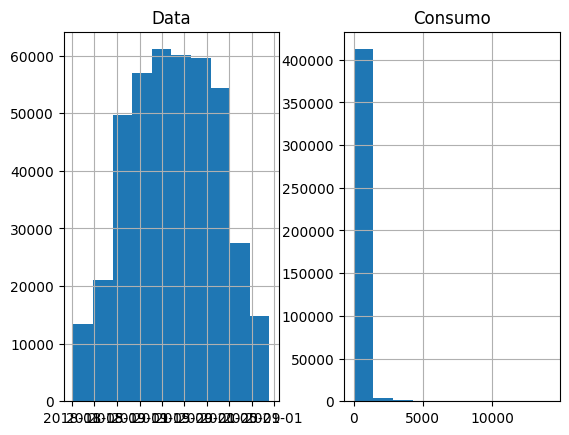

In [74]:
import matplotlib.pyplot as plt

ax = df.hist()
plt.show()

#### Gráfico de Pizza

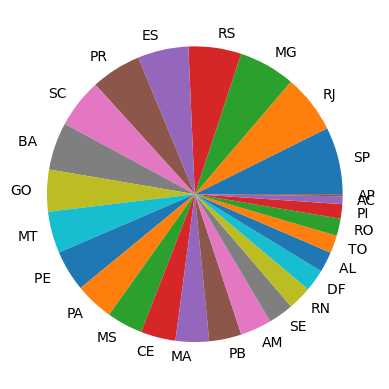

In [79]:
uf_counts = df.UF.value_counts()

uf_counts.plot.pie()

plt.ylabel("")

plt.show()

### Medidas de Localidade

#### Moda

In [83]:
df.Consumo.mode()

0    0.0
Name: Consumo, dtype: float64

#### Média

In [86]:
df.Consumo.mean()

np.float64(106.36108145748679)

#### Mediana

In [87]:
df.Consumo.median()

np.float64(6.72)

#### Percentil

In [90]:
df.Consumo.quantile(0.25), df.Consumo.quantile(0.75), df.Consumo.quantile(0.5)

(np.float64(1.62), np.float64(30.255000000000003), np.float64(6.72))

<Axes: >

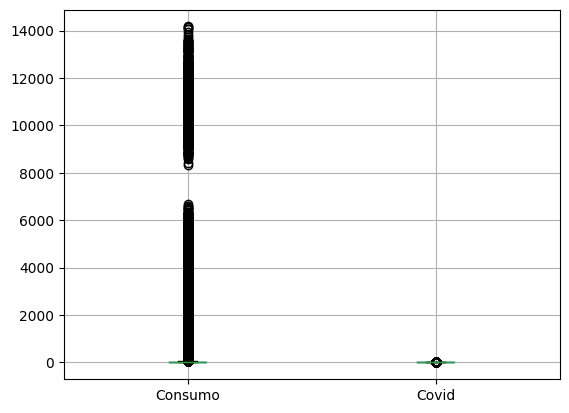

In [93]:
df.boxplot()

### Medidas de Dispersão

#### Intervalo

In [95]:
intervalo = df.Consumo.max() - df.Consumo.min()
intervalo

np.float64(14173.8)

#### variância

In [96]:
df.Consumo.var()

np.float64(336594.93489552353)

#### Desvio padrão

In [97]:
df.Consumo.std()

np.float64(580.1680229860342)

#### Covariância

In [100]:
df.cov(numeric_only=True)

,Consumo,Covid
Consumo,336594.934896,-2.185167
Covid,-2.185167,0.113160


#### Correlação

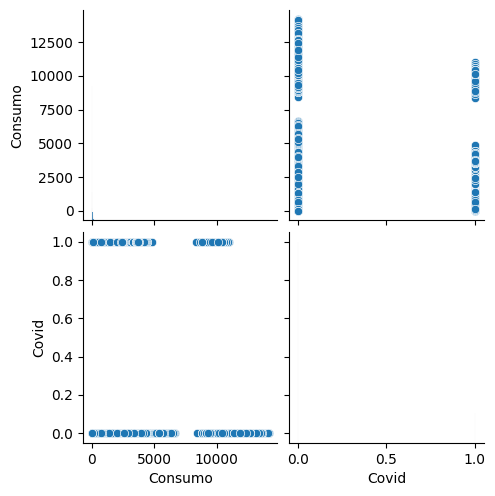

In [ ]:
import seaborn as sns

sns.pairplot(df)

plt.show()